<a href="https://colab.research.google.com/github/ImtiarRafi/Wind-Power/blob/main/Random_Forest_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Absolute Percentage Error (MAPE): 0.35%
Mean Absolute Error: 6.34
Mean Squared Error: 103.69
Root Mean Squared Error: 10.18
R-squared: 0.99


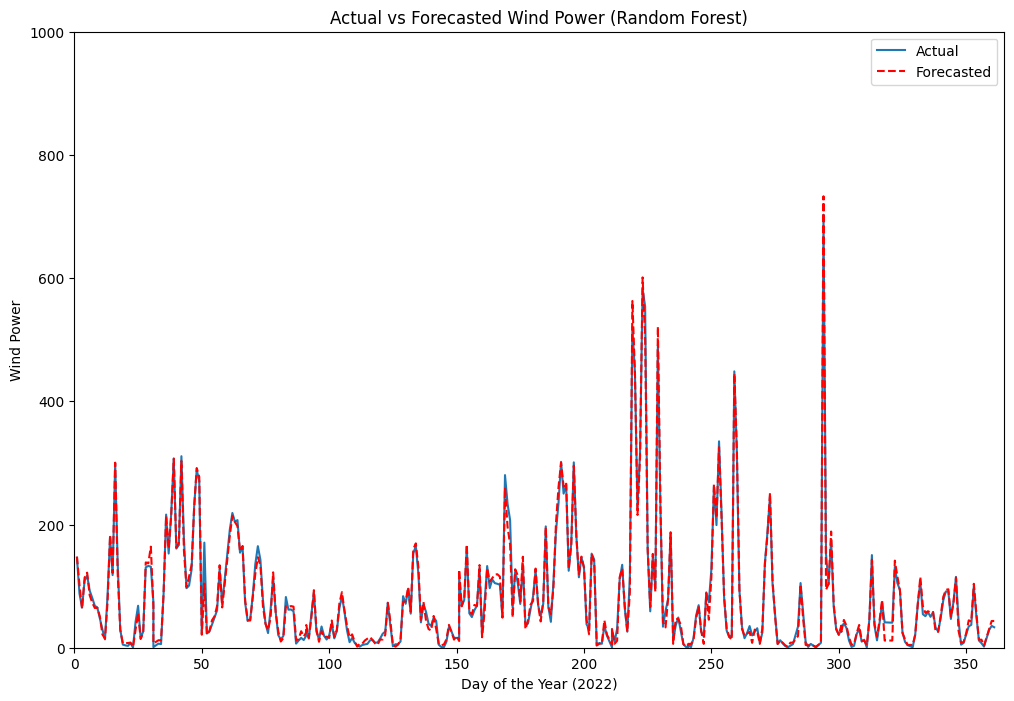

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)  # Adjust parameters as needed

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2:.2f}")

# Plot the actual and forecast values
plt.figure(figsize=(12,8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], predictions, label='Forecasted',color = 'red',linestyle = '--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (Random Forest)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)  # Set the y-axis limit to 1000

plt.show()

Random Forest
Hyperparameter tuning with gridsearchcv and cv method is k-fold

Best Model Parameters: {'max_depth': 5, 'n_estimators': 300}
Mean Absolute Percentage Error (MAPE): 0.52%
Mean Absolute Error: 5.93
Mean Squared Error: 88.85
Root Mean Squared Error: 9.43
R-squared: 0.99


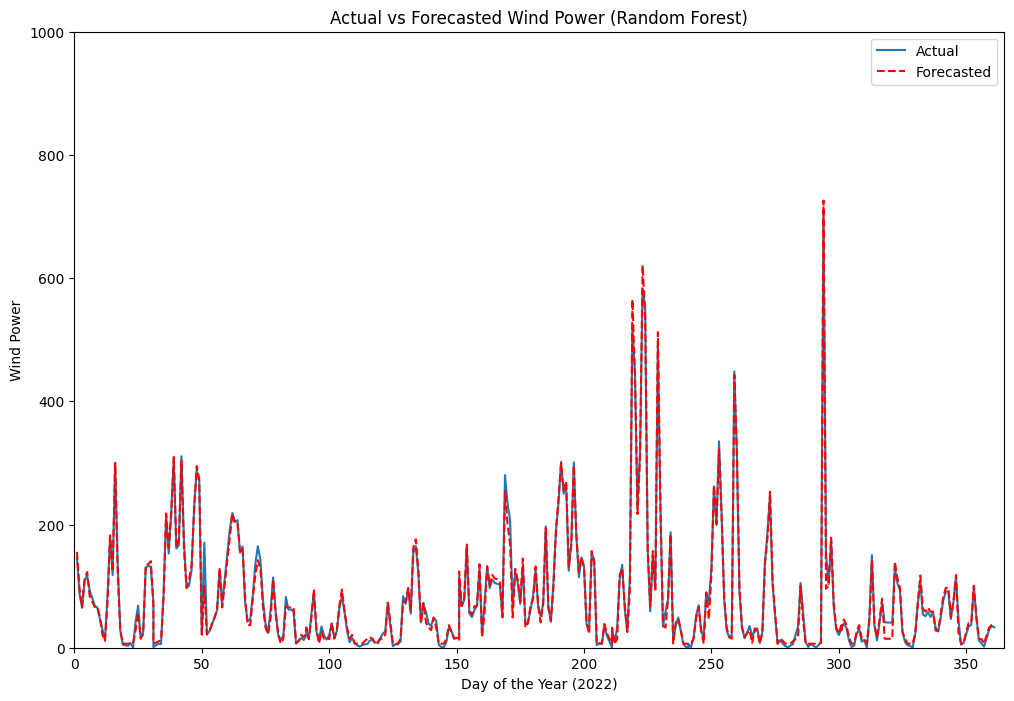

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # You can extend the list of values to search
    'max_depth': [5, 10, 15],        # Adjust these values based on your problem
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, refit=True,
                           scoring='neg_mean_squared_error')  # You can use different scoring metrics

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
predictions = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the actual and forecast values
plt.figure(figsize=(12, 8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], predictions, label='Forecasted', color='red', linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (Random Forest)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)  # Set the y-axis limit to 1000

plt.show()


Random Forest with time series split.


Mean Average Percentage Error (MAPE): 0.24%
Mean Absolute Error (MAE): 7.05
Mean Squared Error (MSE): 209.50
Root Mean Squared Error (RMSE): 13.87
Mean R-squared (R2): 0.99
MAPE on Test Set: 0.35%
MAE on Test Set: 6.34
MSE on Test Set: 103.69
RMSE on Test Set: 10.18
R2 on Test Set: 0.99


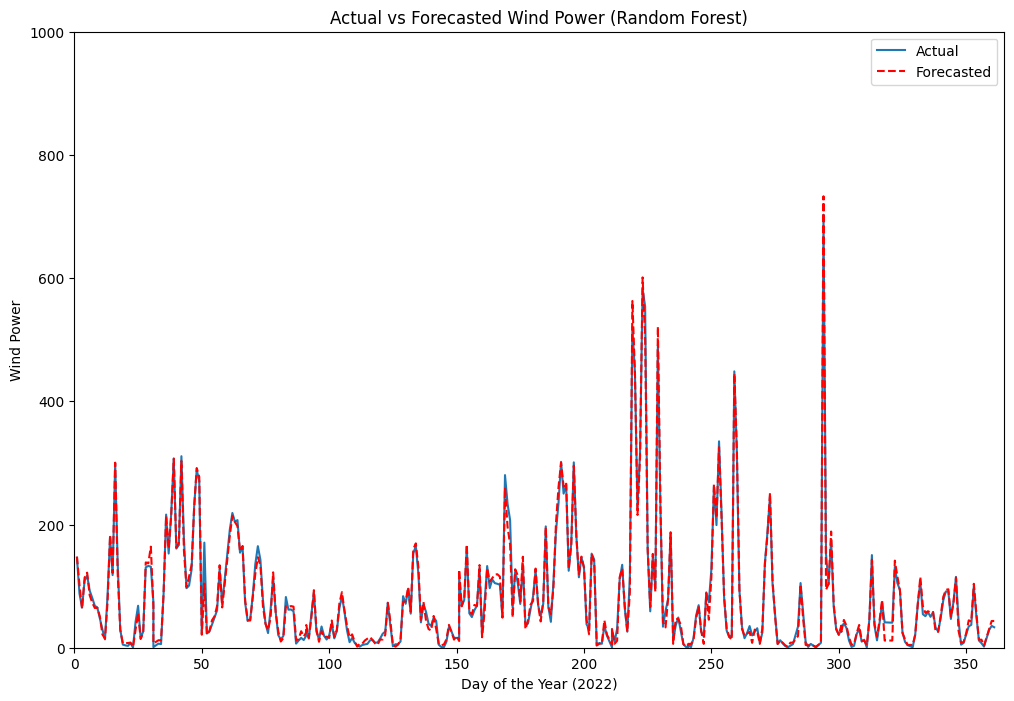

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)  # Adjust parameters as needed

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)  # You can change the number of splits

# Initialize lists to store evaluation metrics
mape_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

for train_index, test_index in tscv.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the model
    rf_model.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    predictions = rf_model.predict(X_test_cv)

    # Calculate evaluation metrics
    mape = mean_absolute_percentage_error(y_test_cv, predictions)
    mae = mean_absolute_error(y_test_cv, predictions)
    mse = mean_squared_error(y_test_cv, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_cv, predictions)

    # Append metrics to lists
    mape_list.append(mape)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Calculate the average of evaluation metrics over all folds
average_mape = np.mean(mape_list)
average_mae = np.mean(mae_list)
average_mse = np.mean(mse_list)
average_rmse = np.mean(rmse_list)
average_r2 = np.mean(r2_list)

print(f"Mean Average Percentage Error (MAPE): {average_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {average_mae:.2f}")
print(f"Mean Squared Error (MSE): {average_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {average_rmse:.2f}")
print(f"Mean R-squared (R2): {average_r2:.2f}")

# Train the model on the full training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Calculate evaluation metrics on the test set
mape = mean_absolute_percentage_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MAPE on Test Set: {mape:.2f}%")
print(f"MAE on Test Set: {mae:.2f}")
print(f"MSE on Test Set: {mse:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")
print(f"R2 on Test Set: {r2:.2f}")

# Plot the actual and forecast values
plt.figure(figsize=(12, 8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], predictions, label='Forecasted', color='red', linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (Random Forest)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)  # Set the y-axis limit to 1000

plt.show()


Random Forest (Hyperparameter tuning with
Grid Search with Time Series Split)

Best Model Parameters: {'max_depth': 5, 'n_estimators': 100}
Mean Absolute Percentage Error (MAPE): 0.52%
Mean Absolute Error (MAE): 5.94
Mean Squared Error (MSE): 87.26
Root Mean Squared Error (RMSE): 9.34
Mean R-squared (R2): 0.99


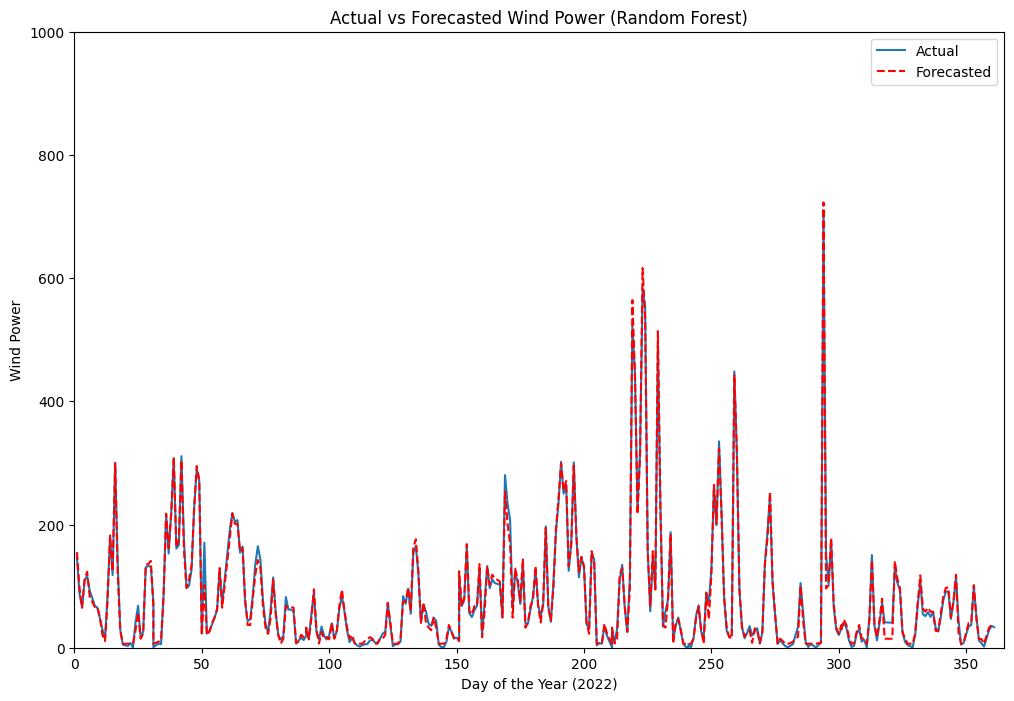

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # You can extend the list of values to search
    'max_depth': [5, 10, 15],        # Adjust these values based on your problem
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create a custom time series cross-validation iterator
tscv = TimeSeriesSplit(n_splits=10)  # You can change the number of splits

# Initialize GridSearchCV with the model, hyperparameter grid, and time series cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=tscv, refit=True,
                           scoring='neg_mean_squared_error')  # You can use different scoring metrics

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
predictions = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean R-squared (R2): {r2:.2f}")

# Plot the actual and forecast values
plt.figure(figsize=(12, 8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], predictions, label='Forecasted', color='red', linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (Random Forest)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)  # Set the y-axis limit to 1000

plt.show()
